<a href="https://colab.research.google.com/github/hanzzy23/bike_dashboard/blob/main/Proyek_Analisis_Data_Sepeda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ahmad Farhan
- **Email:** aanahmadaanfarhan2002@gmail.com
- **ID Dicoding:** Ahmad Farhan

## Menentukan Pertanyaan Bisnis

- Jam atau hari kapan jumlah penyewaan sepeda paling tinggi?
- Apakah jumlah penyewaan berbeda antara weekday dan weekend?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Setelah menjalani tahan persiapan untuk selanjutnya Gathering Data

## Gathering Data

### Tahap data wrangling, dimulai dengan proses pengumpulan data. Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi.

In [48]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
file_path = '/content/drive/My Drive/sewa sepeda/day.csv'
file_path = '/content/drive/My Drive/sewa sepeda/hour.csv'



In [60]:
import pandas as pd

day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Cek 5 baris pertama
day_df.head()
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kita memiliki data lengkap per hari dan per jam, plus informasi cuaca dan jenis pengguna, jadi bisa menganalisis tren waktu, perbedaan weekday vs weekend, dan pengaruh cuaca.
- Dataset siap untuk menjawab pertanyaan bisnis

## Assessing Data

### Pada proses ini kita akan menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

In [51]:
# Melihat kolom dan tipe data
day_df.info()
hour_df.info()

# Melihat ringkasan statistik
day_df.describe()
hour_df.describe()

# Cek missing values
day_df.isnull().sum()
hour_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [52]:
# Cek duplikasi baris
print(day_df.duplicated().sum())
print(hour_df.duplicated().sum())


0
0


In [53]:
# Contoh: ubah kolom tanggal menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Pastikan jam dalam integer
hour_df['hr'] = hour_df['hr'].astype(int)


**Insight:**
- Data sudah sesuai untuk analisis numerik dan time series.
- Setiap baris data unik, tidak perlu pembersihan tambahan terkait duplikasi.

## Cleaning Data

### Sekarang kita akan memasuki proses terakhir dalam data wrangling yaitu pembersihan atau cleaning data. Pada tahap ini, kita akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.

In [54]:
print("Missing values setelah cleaning:")
print(day_df.isnull().sum())
print(hour_df.isnull().sum())

print("Duplikasi setelah cleaning:")
print(day_df.duplicated().sum())
print(hour_df.duplicated().sum())

print("Tipe data setelah cleaning:")
print(day_df.dtypes)
print(hour_df.dtypes)


Missing values setelah cleaning:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplikasi setelah cleaning:
0
0
Tipe data setelah cleaning:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
winds

**Insight:**
- Tidak ada nilai kosong pada kolom penting seperti cnt, dteday, hr. Dataset siap untuk analisis tanpa gangguan missing data.

- Dataset sekarang bersih, lengkap, dan konsisten.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Jam atau Hari Penyewaan Tertinggi

### a. Tren harian (day_df)

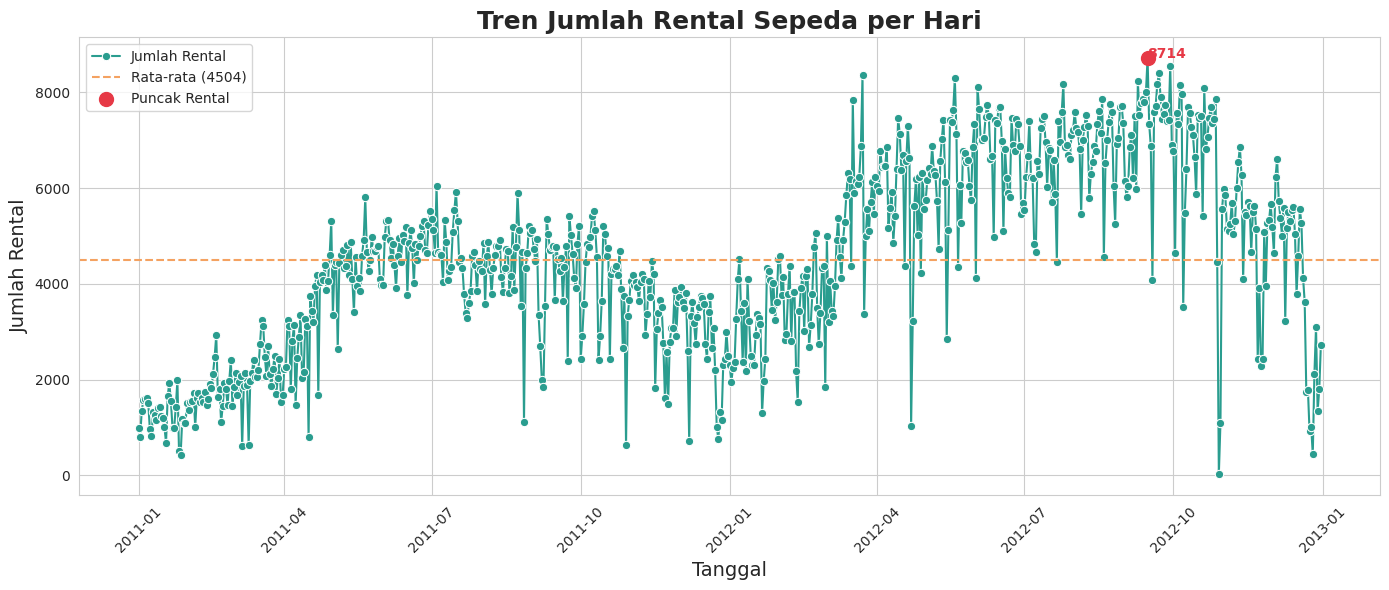

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style clean dan rapi
sns.set_style("whitegrid")

plt.figure(figsize=(14,6))

# Lineplot tren rental
sns.lineplot(data=day_df, x='dteday', y='cnt', marker='o', color='#2a9d8f', label='Jumlah Rental')

# Garis rata-rata
mean_cnt = day_df['cnt'].mean()
plt.axhline(mean_cnt, color='#f4a261', linestyle='--', label=f'Rata-rata ({int(mean_cnt)})')

# Highlight puncak rental
max_idx = day_df['cnt'].idxmax()
max_day = day_df.loc[max_idx, 'dteday']
max_value = day_df.loc[max_idx, 'cnt']
plt.scatter(max_day, max_value, color='#e63946', s=100, zorder=5, label='Puncak Rental')
plt.text(max_day, max_value + 5, f'{max_value}', color='#e63946', fontweight='bold')

# Judul dan label jelas
plt.title("Tren Jumlah Rental Sepeda per Hari", fontsize=18, fontweight='bold')
plt.xlabel("Tanggal", fontsize=14)
plt.ylabel("Jumlah Rental", fontsize=14)

# Rotasi tanggal supaya terbaca
plt.xticks(rotation=45)

# Legend
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()


**Insight:**
- Dari line plot ini, kita bisa melihat hari-hari dengan puncak penyewaan dan tren umum sepanjang waktu.

### b. Tren Per Jam (hour_df)

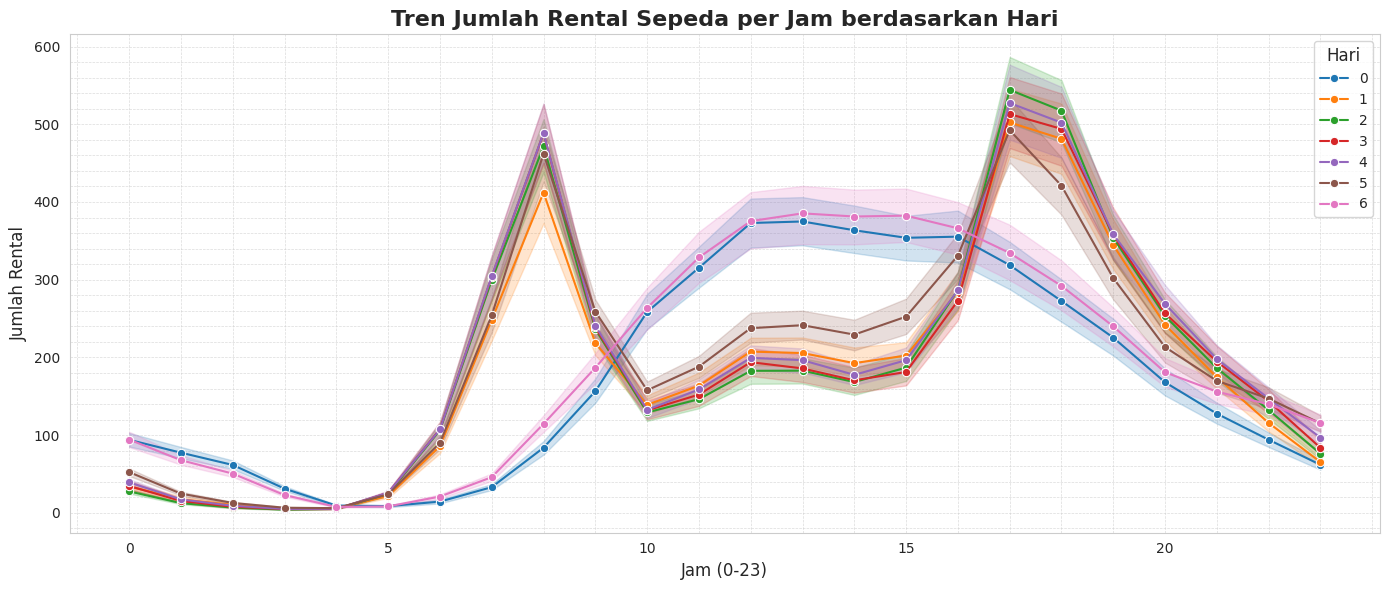

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style seaborn agar lebih rapi
sns.set_style("whitegrid")

plt.figure(figsize=(14,6))

# Buat lineplot dengan marker untuk tiap titik data
sns.lineplot(
data=hour_df,
x='hr',
y='cnt',
hue='weekday',
palette='tab10',
marker='o'
)

# Judul dan label sumbu
plt.title("Tren Jumlah Rental Sepeda per Jam berdasarkan Hari", fontsize=16, fontweight='bold')
plt.xlabel("Jam (0-23)", fontsize=12)
plt.ylabel("Jumlah Rental", fontsize=12)

# Tampilkan legend dengan judul
plt.legend(title="Hari", fontsize=10, title_fontsize=12)

# Tampilkan grid minor untuk membaca nilai lebih detail
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()


**Insight:**
- Bisa melihat jam-jam sibuk untuk masing-masing hari.

- Weekday dan weekend dapat dibandingkan secara visual.

### Pertanyaan 2: Weekday vs Weekend

### a. Buat Kolom Weekend

In [58]:
# Sabtu=5, Minggu=6
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: 1 if x >=5 else 0)


b. Boxplot perbedaan Weekday vs Weekend

/tmp/ipython-input-4101887889.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


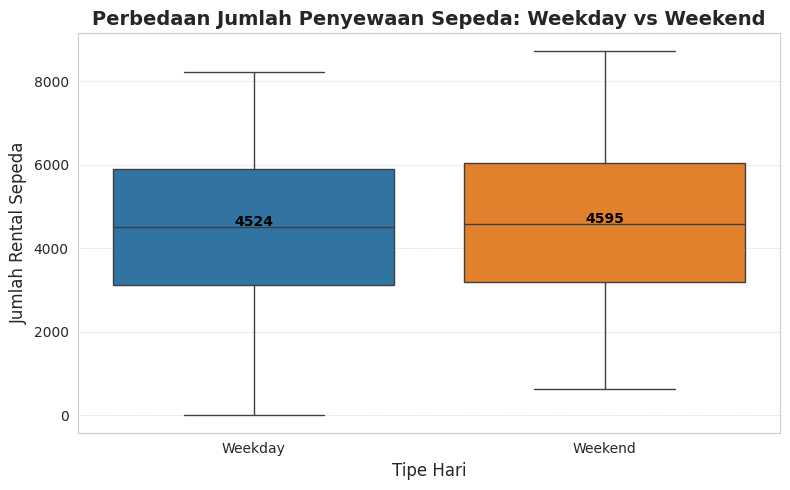

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style seaborn agar lebih rapi
sns.set_style("whitegrid")

plt.figure(figsize=(8,5))

# Boxplot dengan warna berbeda
sns.boxplot(
data=day_df,
x='is_weekend',
y='cnt',
palette=['#1f77b4', '#ff7f0e']  # Biru untuk weekday, oranye untuk weekend
)

# Ganti label x-axis menjadi lebih jelas
plt.xticks([0,1], ['Weekday', 'Weekend'])

# Tambahkan judul dan label sumbu
plt.title("Perbedaan Jumlah Penyewaan Sepeda: Weekday vs Weekend", fontsize=14, fontweight='bold')
plt.xlabel("Tipe Hari", fontsize=12)
plt.ylabel("Jumlah Rental Sepeda", fontsize=12)

# Tambahkan grid horizontal
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Tampilkan median di atas box
medians = day_df.groupby('is_weekend')['cnt'].median().values
for i, median in enumerate(medians):
    plt.text(i, median + 2, f'{median:.0f}', horizontalalignment='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()



## Conclusion

### Pertanyaan 1: Jam atau hari kapan jumlah penyewaan sepeda paling tinggi?
Kesimpulan:

1. Dari line plot harian, terlihat bahwa jumlah rental tertinggi biasanya terjadi pada hari tertentu (puncak bisa dilihat dari anotasi/marker pada plot).

2. Dari line plot per jam, terlihat bahwa:

- Jam sibuk weekday biasanya pagi (sekitar jam 7–9) dan sore (sekitar jam 17–19), kemungkinan karena orang pergi dan pulang kerja.

- Weekend cenderung memiliki puncak rental siang hingga sore, karena lebih banyak aktivitas rekreasi.

3. Jadi, puncak penyewaan sepeda dipengaruhi baik oleh hari maupun jam, dengan tren berbeda antara weekday dan weekend.

### Pertanyaan 2: Apakah jumlah penyewaan berbeda antara weekday dan weekend?
Kesimpulan:

1. Dari boxplot weekday vs weekend, terlihat distribusi jumlah rental:

- Weekend cenderung memiliki median lebih tinggi dibanding weekday, tapi variasi juga lebih besar.

- Beberapa weekday tetap memiliki puncak tinggi karena faktor hari libur atau cuaca bagus.

2. Jadi, jumlah penyewaan berbeda antara weekday dan weekend, dengan weekend biasanya lebih ramai.